In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
dev_loc = r'/axp/buanalytics/csswcpfwt/dev/'

In [3]:
#pull the processed data
df_data = pd.read_csv(dev_loc+"/processed_data.csv")
df_data.head(1)


,featr_nm,featr_desc,story_nm,story_ds,PFWT
0,NaN,channel owner want support aor program enablin...,ability edis get aor data,channel owner want edis get data aor data disp...,New Application Development / New App Dev Testing


In [4]:
# combine features
class_list = ["New Application Development / New App Dev Testing", "Other Non-Application Development activities", "Research & Development (R&D)"]
cseries_list=[]; mseries=[]
for lbl in class_list:
    print(lbl+":")
    class_df = df_data[df_data['PFWT']==lbl]; #print(class_df.head(1))
    class_df = class_df.drop('PFWT', axis=1)
    i=0
    for series in class_df.columns:
        if i==0:
            class_df['merge_series'] = class_df[series]
        else:
            class_df['merge_series'] = class_df['merge_series']+class_df[series]
        i=i+1
#         print(len(str(class_df['merge_series'].tolist()[0])))
    cseries=class_df['merge_series'].dropna(); #print(class_df.head(1))
    cseries_list.append(cseries)
    mseries = mseries+cseries.tolist(); print(len(mseries))
    
# for l in cseries_list:
#     print(l[:10])

New Application Development / New App Dev Testing:
24383
Other Non-Application Development activities:
39011
Research & Development (R&D):
48784


In [7]:
class_vectors=[]

tfidf_vec = TfidfVectorizer()
tfidf_vec = tfidf_vec.fit(mseries)

for cseries in cseries_list:
    x_vec = tfidf_vec.transform(cseries).toarray()
    class_vectors.append(x_vec)

for vec in class_vectors: print(vec.shape)

(24383, 111253)
(14628, 111253)
(9773, 111253)


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state = 123, svd_solver = 'auto')
x1 = pd.DataFrame(pca.fit_transform(class_vectors[0]))
x2 = pd.DataFrame(pca.fit_transform(class_vectors[1]))
x3 = pd.DataFrame(pca.fit_transform(class_vectors[2]))
print(x1.shape, x2.shape, x3.shape)

(24383, 3) (14628, 3) (9773, 3)


In [10]:
x1['y'] = pd.Series(np.array(["New Application Development / New App Dev Testing" for i in range(len(x1))]), index=x1.index)
x2['y'] = pd.Series(np.array(["Other Non-Application Development activities" for i in range(len(x2))]), index=x2.index)
x3['y'] = pd.Series(np.array(["Research & Development (R&D)" for i in range(len(x3))]), index=x3.index)
# x1.head(1)

df_x = pd.concat([x1, x2, x3]); print(df_x.shape)
x_new = df_x.drop('y', axis=1); print(x_new.shape)
y = df_x['y']; print(y.shape)
# directly train from here as the data is vectorized and dcomposed

(48784, 4)
(48784, 3)
(48784,)


(4, 24383) (4, 14628) (4, 9773)


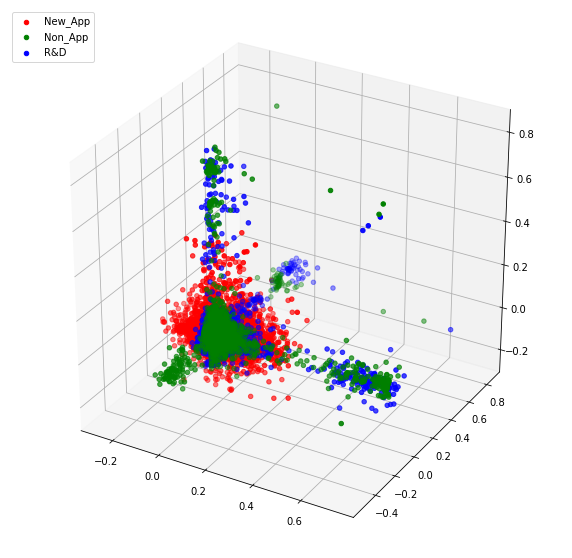

In [11]:
c1 = x1.values.transpose()
c2 = x2.values.transpose()
c3 = x3.values.transpose()
print(c1.shape, c2.shape, c3.shape)

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

import random
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)
ax = fig.add_subplot(111, projection='3d')

color_list = ['r','g','b']
lable_list = ['New_App', 'Non_App', 'R&D']

p=5000; i=0
for xyz in [c1,c2,c3]:
    a = random.sample(xyz[0].tolist(),p); #a = reject_outliers(np.array(a))
    b = random.sample(xyz[1].tolist(),p); #b = reject_outliers(np.array(b))
    c = random.sample(xyz[2].tolist(),p); #c = reject_outliers(np.array(c))
    olen = min(len(a), len(b), len(c)); #print(olen)
    a = a[:olen]; b = b[:olen]; c = c[:olen]
    ax.scatter(a, b, c, s=20, c=color_list[i], marker="o", label=lable_list[i])
    i=i+1
plt.legend(loc='upper left')
plt.show()